In [101]:
#Actividad Evaluable: Patrones con K-means
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min


%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')


In [102]:
dataframe = pd.read_csv(r"avocado.csv")
dataframe.head()

dataframe.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [103]:
dataframe.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [124]:
print(dataframe.groupby('type').size())
print(dataframe.groupby('region').size())
print(dataframe.groupby('year').size())
print(dataframe.groupby('Unnamed: 0').size())

type
conventional    9126
organic         9123
dtype: int64
region
Albany                 338
Atlanta                338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago                338
CincinnatiDayton       338
Columbus               338
DallasFtWorth          338
Denver                 338
Detroit                338
GrandRapids            338
GreatLakes             338
HarrisburgScranton     338
HartfordSpringfield    338
Houston                338
Indianapolis           338
Jacksonville           338
LasVegas               338
LosAngeles             338
Louisville             338
MiamiFtLauderdale      338
Midsouth               338
Nashville              338
NewOrleansMobile       338
NewYork                338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh     

dataframe.drop(['type'],1).hist()
plt.show()

sb.pairplot(dataframe.dropna(), hue='type',size=4,vars=["Small Bags","Large Bags","XLarge Bags"],kind='scatter')



# Intento de k-Means con 'type'

#Para el ejercicio, sólo seleccionamos 3 dimensiones, para poder graficarlo
X = np.array(dataframe[["Small Bags","Large Bags","XLarge Bags"]])
y = np.array(dataframe[type])
X.shape
y


IndexError: list index out of range

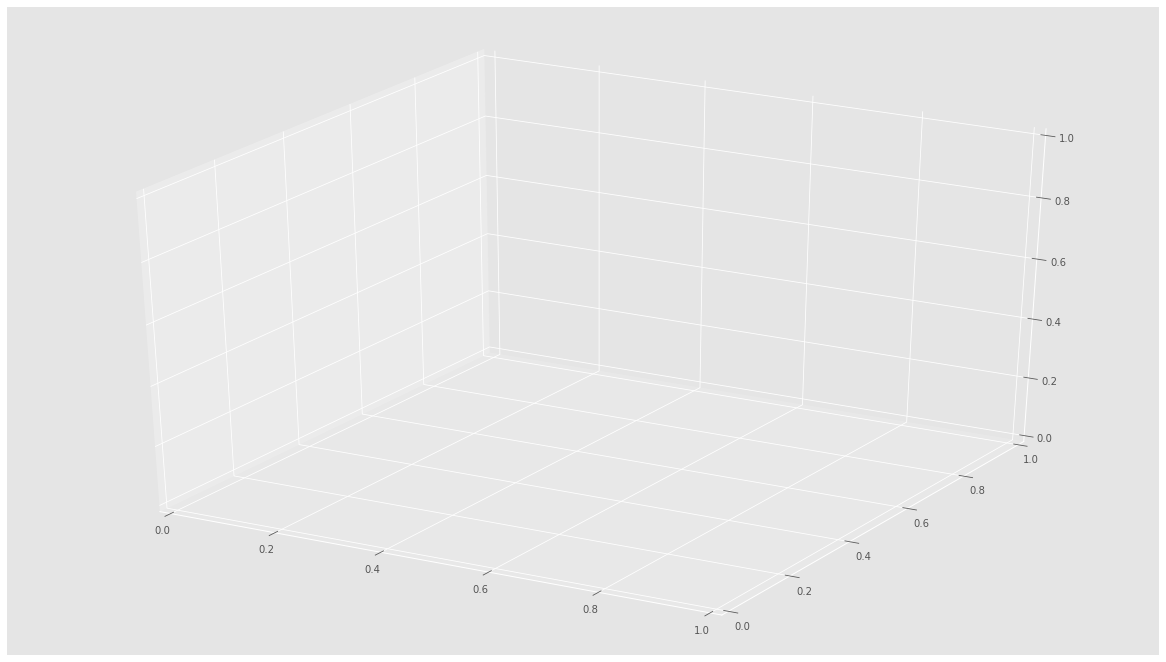

In [105]:
fig = plt.figure()
ax = Axes3D(fig)
colores=['blue','red','green','blue','cyan','yellow','orange','black','pink','brown','purple']
#NOTA: asignamos la posición cero del array repetida pues las categorias comienzan en id 1. 
asignar=[]
for row in y:
    asignar.append(colores[row])
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)

# Intento de K-means con 'year'

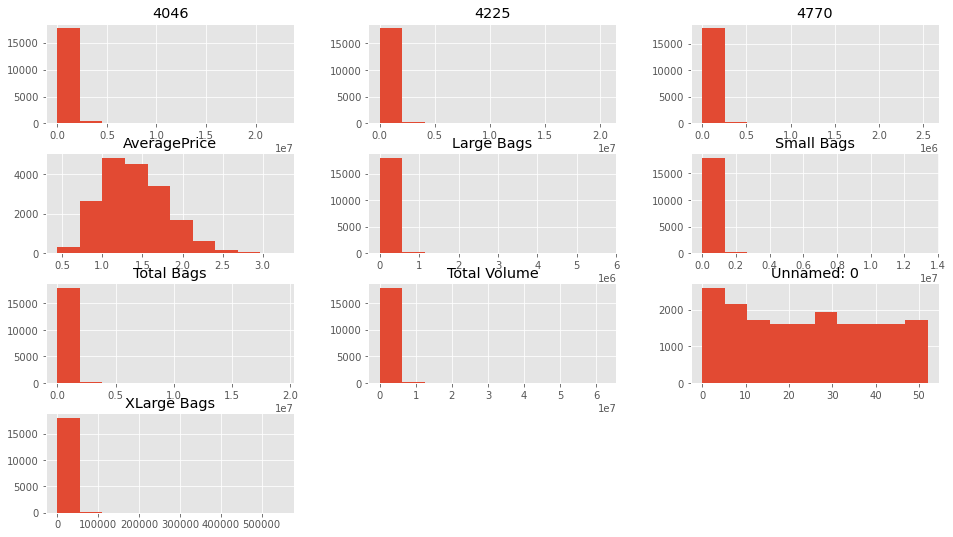

C:\Users\mauhm\anaconda3\lib\site-packages\seaborn\axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\mauhm\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


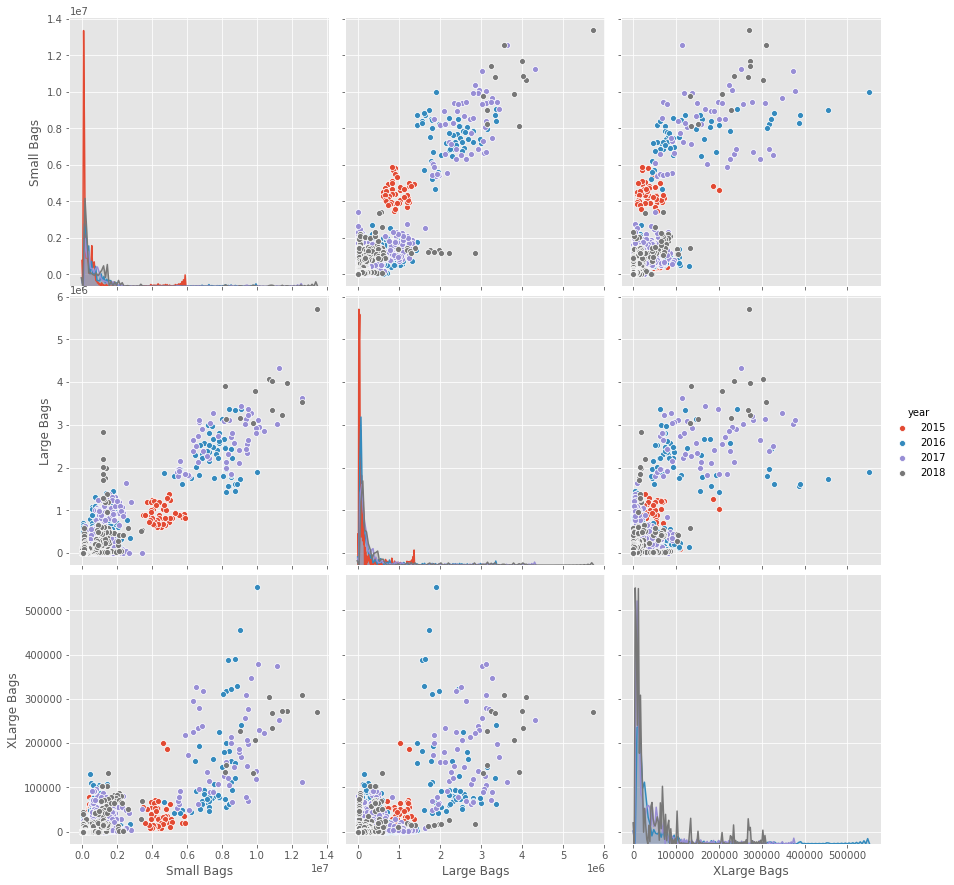

In [106]:
dataframe.drop(['year'],1).hist()
plt.show()
sb.pairplot(dataframe.dropna(), hue='year',size=4,vars=["Small Bags","Large Bags","XLarge Bags"],kind='scatter')

In [107]:
#Para el ejercicio, sólo seleccionamos 3 dimensiones, para poder graficarlo
X = np.array(dataframe[["Small Bags","Large Bags","XLarge Bags"]])
y = np.array(dataframe['year'])
X.shape
y

array([2015, 2015, 2015, ..., 2018, 2018, 2018], dtype=int64)

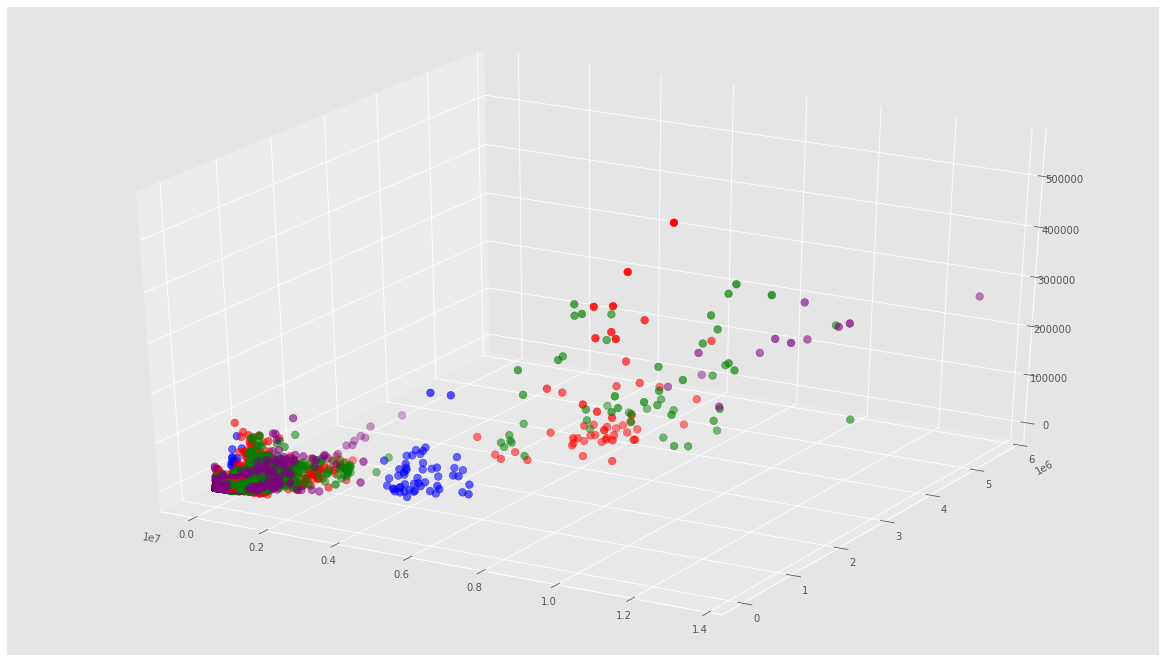

In [108]:
fig = plt.figure()
ax = Axes3D(fig)
colores=['blue','red','green','purple']
#NOTA: asignamos la posición cero del array repetida pues las categorias comienzan en id 1. 
asignar=[]
for row in y:
    asignar.append(colores[row-2015])
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)

# Sacando el valor de k con valores de 'years'

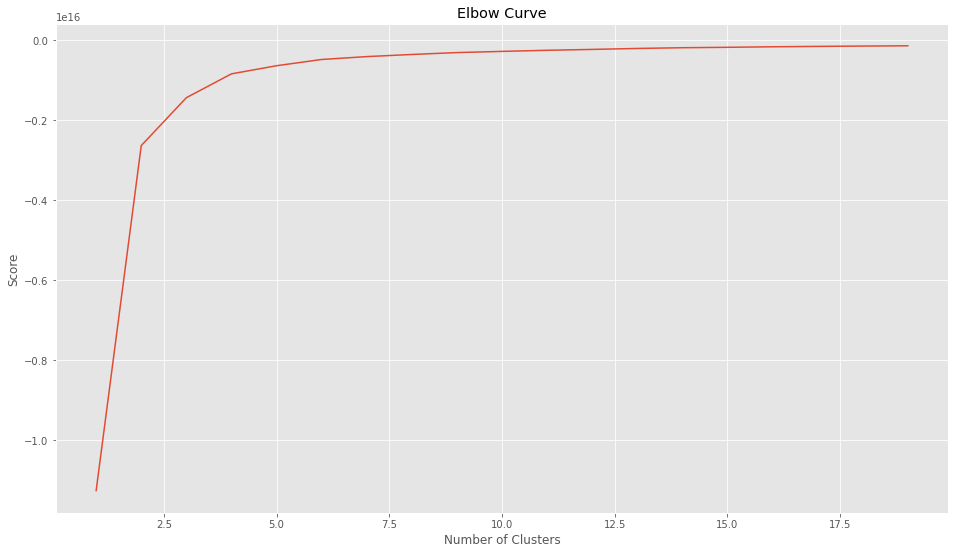

In [109]:

Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [150]:
#Por lo tanto k=2
kmeans = KMeans(n_clusters=2).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[1.18842119e+05 3.56533947e+04 1.95282475e+03]
 [7.04172239e+06 2.07743166e+06 1.28013175e+05]]


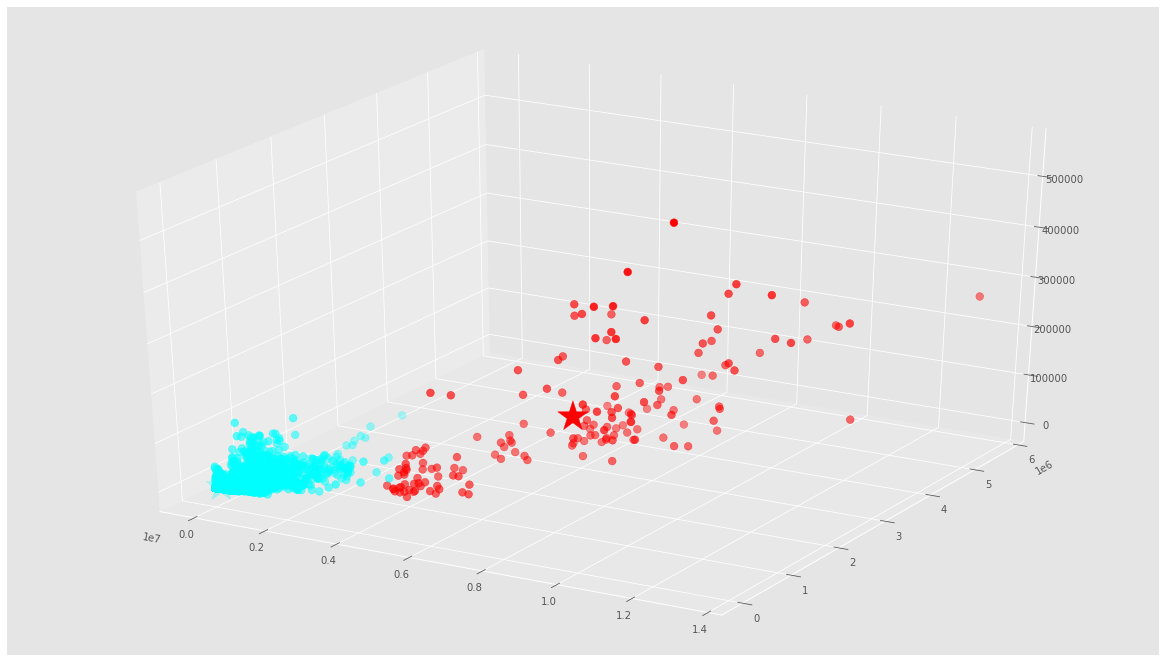

In [152]:
labels = kmeans.predict(X)
C = kmeans.cluster_centers_
colores=['cyan','red']
asignar=[]
for row in labels:
    asignar.append(colores[row])
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:,0], X[:,1], X[:,2], c=asignar, s=60)
ax.scatter(C[:,0], C[:,1], C[:,2], marker='*', c=colores, s=1000)

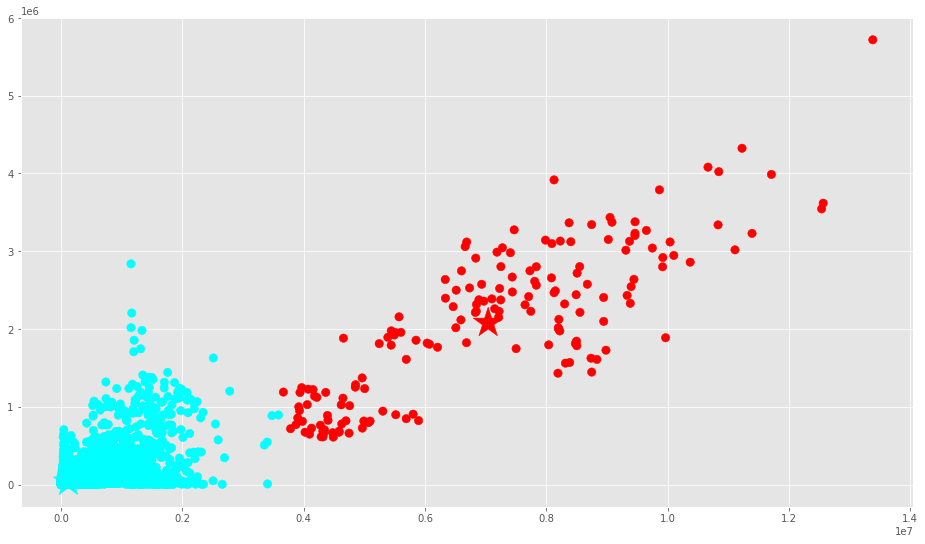

In [153]:
f1 = dataframe['Small Bags'].values
f2 = dataframe['Large Bags'].values

plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:,0], C[:,1], marker="*", c=colores, s=1000)
plt.show()

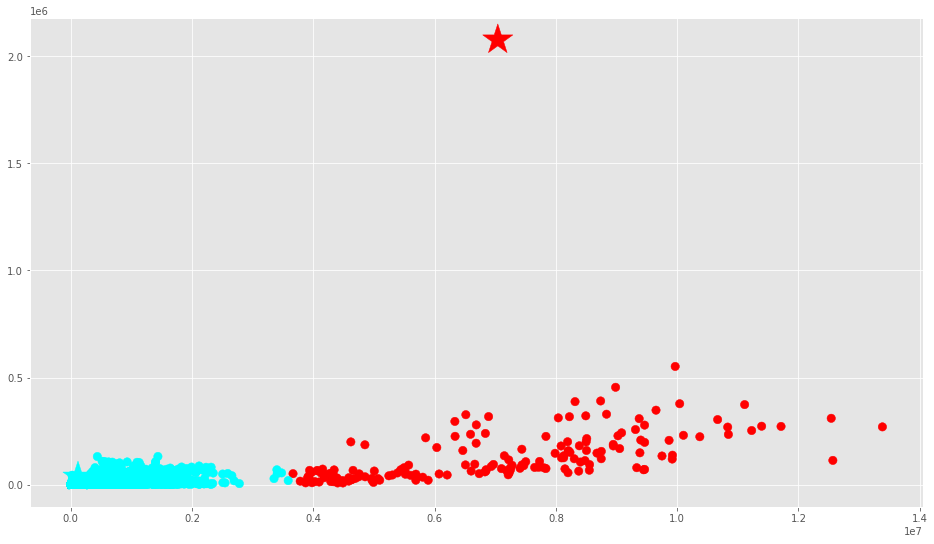

In [154]:
f1 = dataframe['Small Bags'].values
f2 = dataframe['XLarge Bags'].values

plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:,0], C[:,1], marker="*", c=colores, s=1000)
plt.show()

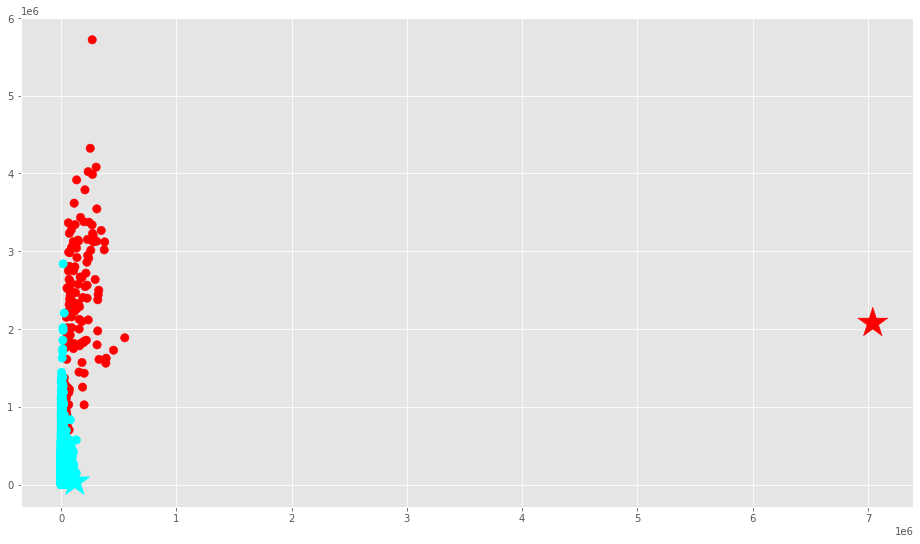

In [155]:
f1 = dataframe['XLarge Bags'].values
f2 = dataframe['Large Bags'].values

plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:,0], C[:,1], marker="*", c=colores, s=1000)
plt.show()

In [156]:
copy =  pd.DataFrame()
copy['usuario']=dataframe['Unnamed: 0'].values
copy['year']=dataframe['year'].values
copy['label'] = labels
cantidadGrupo =  pd.DataFrame()
cantidadGrupo['color']=colores
cantidadGrupo['cantidad']=copy.groupby('label').size()
cantidadGrupo

,color,cantidad
0,cyan,18082
1,red,167


In [157]:
group_referrer_index = copy['label'] ==0
group_referrals = copy[group_referrer_index]
 
diversidadGrupo =  pd.DataFrame()
diversidadGrupo['year']=[2015,2016,2017,2018]
diversidadGrupo['cantidad']=group_referrals.groupby('year').size()
diversidadGrupo

,year,cantidad
0,2015,NaN
1,2016,NaN
2,2017,NaN
3,2018,NaN


In [158]:
closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, X)
closest
users=dataframe['year'].values
for row in closest:
    print(users[row])

2018
2016


# Intento de K-means con 'Unnamed:0' que en realidad es el número de semanas

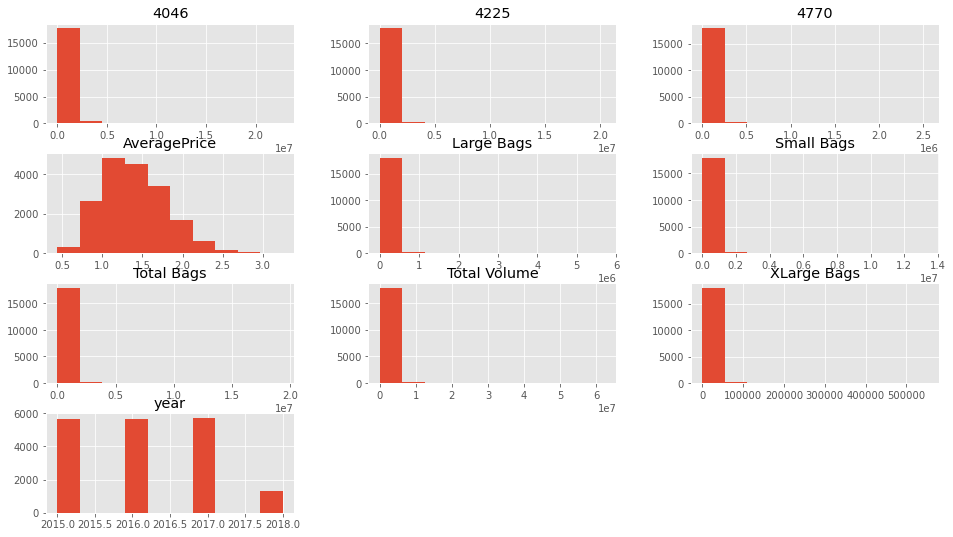

C:\Users\mauhm\anaconda3\lib\site-packages\seaborn\axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\mauhm\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\mauhm\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


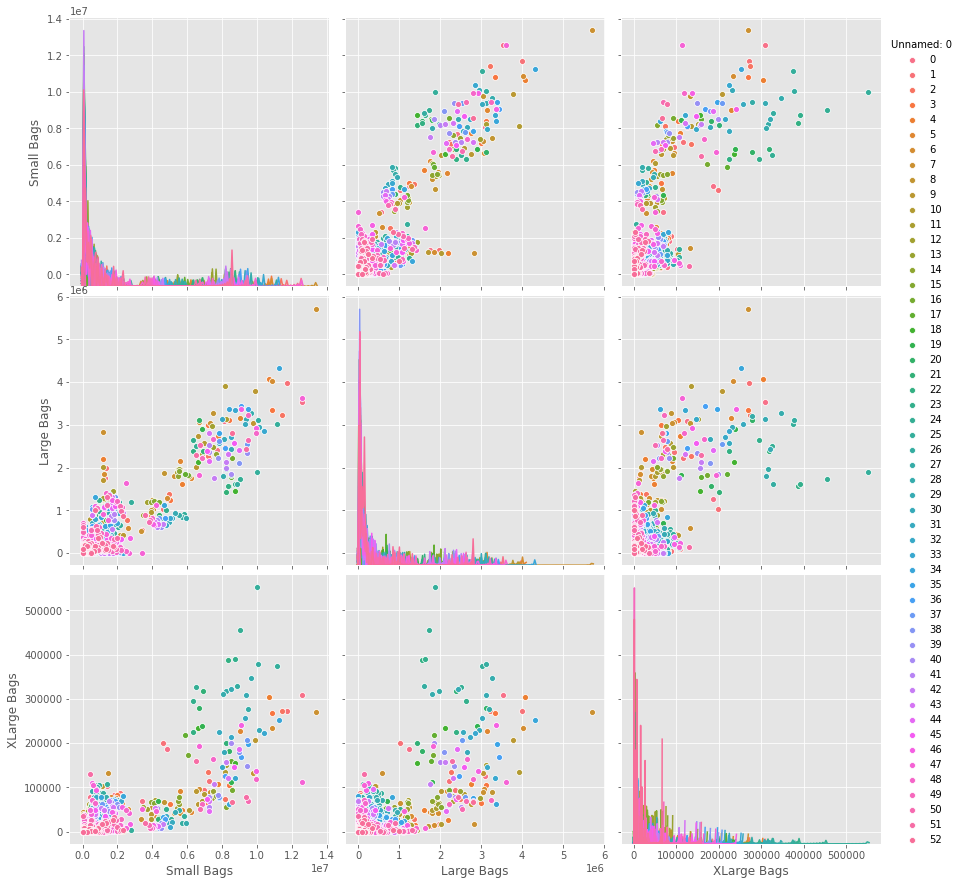

In [159]:
dataframe.drop(['Unnamed: 0'],1).hist()
plt.show()
sb.pairplot(dataframe.dropna(), hue='Unnamed: 0',size=4,vars=["Small Bags","Large Bags","XLarge Bags"],kind='scatter')

In [160]:
#Para el ejercicio, sólo seleccionamos 3 dimensiones, para poder graficarlo
X = np.array(dataframe[["Small Bags","Large Bags","XLarge Bags"]])
y = np.array(dataframe['Unnamed: 0'])
X.shape
y

array([ 0,  1,  2, ...,  9, 10, 11], dtype=int64)

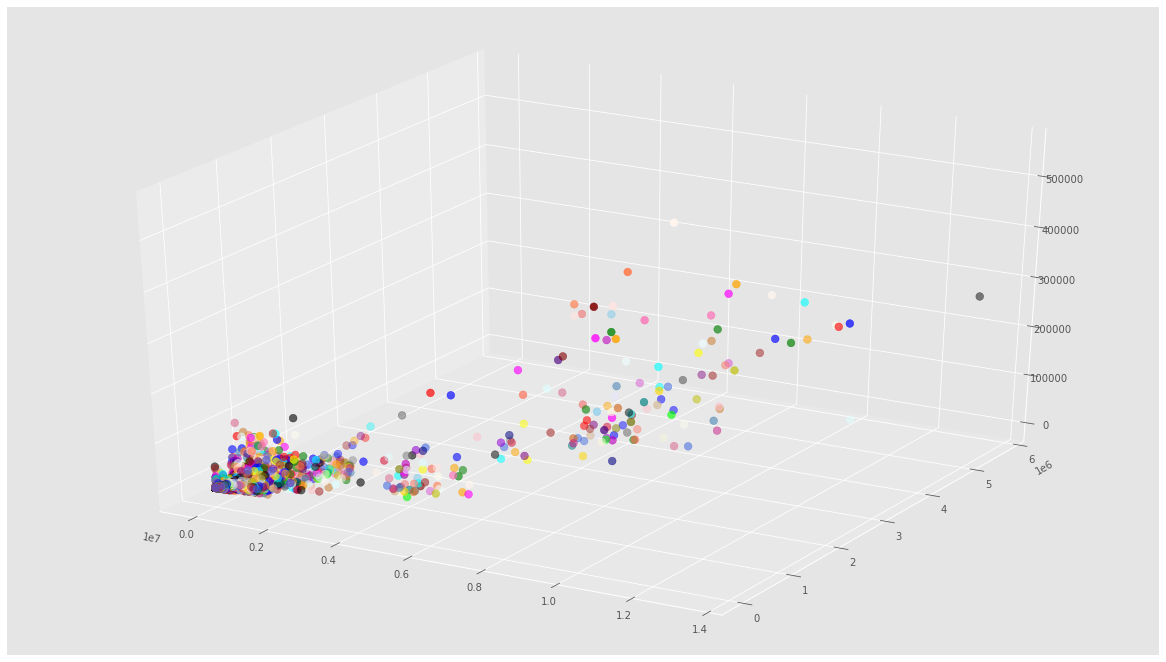

In [161]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
fig = plt.figure()
ax = Axes3D(fig)
colores=['blue','red','green','blue','cyan','yellow','orange','black','pink','brown','purple','royalblue','gray','crimson','darkviolet','navy','tomato','magenta','indigo','m','skyblue','lightcoral','maroon','mistyrose','coral','seashell','orange','g','fuchsia','hotpink','orchid','azure','aqua','y','ivory','salmon','brown','dimgrey','teal','lime','lavender','cornsilk','chocolate','olive','gold','tan','peru','lightcyan','steelblue','mediumvioletred','royalblue','palevioletred','beige','limegreen','turquoise','violet','plum','magenta','lavenderblush','lemonchiffon','bisque','darksalmon']
#NOTA: asignamos la posición cero del array repetida pues las categorias comienzan en id 1. 
asignar=[]
for row in y:
    asignar.append(colores[row])
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)

# Sacando k para 'Unnamed: 0'

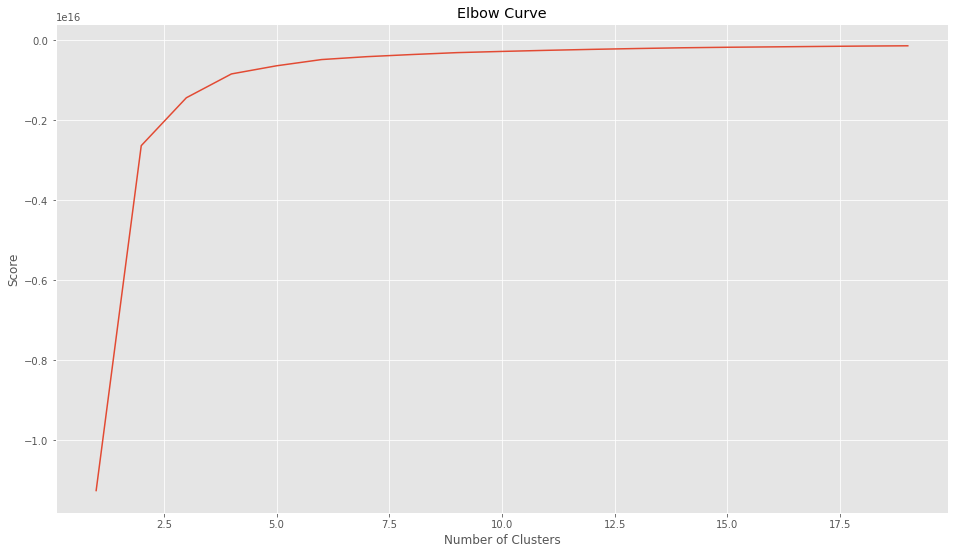

In [132]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [162]:
#Por lo tanto k=2
kmeans = KMeans(n_clusters=2).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[1.18842119e+05 3.56533947e+04 1.95282475e+03]
 [7.04172239e+06 2.07743166e+06 1.28013175e+05]]


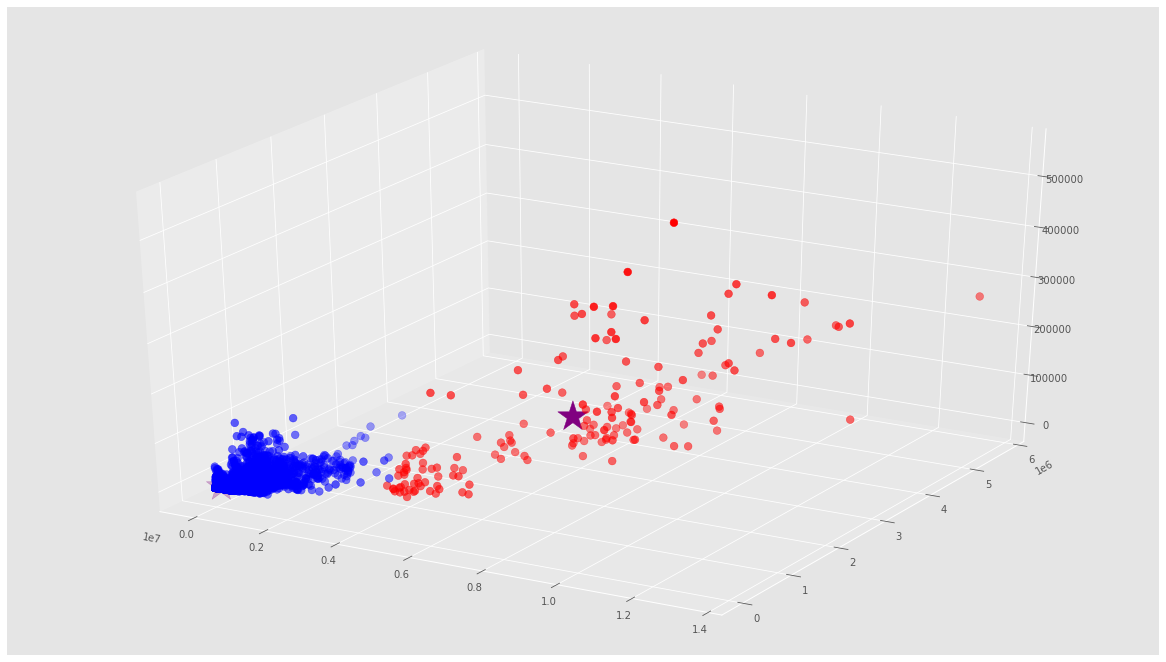

In [163]:
from matplotlib import pyplot as plt
import random
labels = kmeans.predict(X)
C = kmeans.cluster_centers_
asignar=[]
for row in labels:
    asignar.append(colores[row])
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:,0], X[:,1], X[:,2], c=asignar, s=60)
ax.scatter(C[:,0], C[:,1], C[:,2], marker='*', c=random.choice(colores), s=1000)

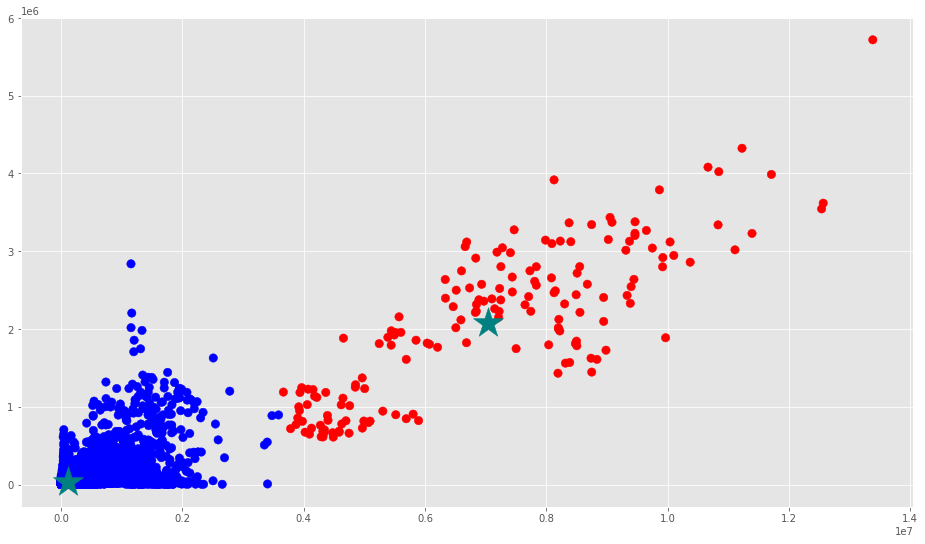

In [164]:
import random
f1 = dataframe['Small Bags'].values
f2 = dataframe['Large Bags'].values
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:,0], C[:,1], marker="*", c=random.choice(colores), s=1000)
plt.show()

ValueError: 'c' argument has 62 elements, which is inconsistent with 'x' and 'y' with size 2.

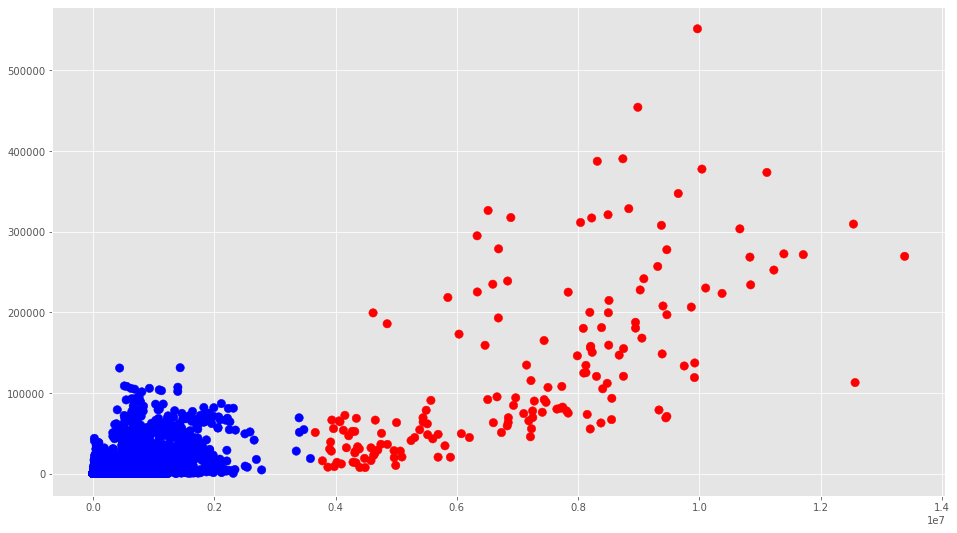

In [165]:
f1 = dataframe['Small Bags'].values
f2 = dataframe['XLarge Bags'].values

plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:,0], C[:,1], marker="*", c=colores, s=1000)
plt.show()

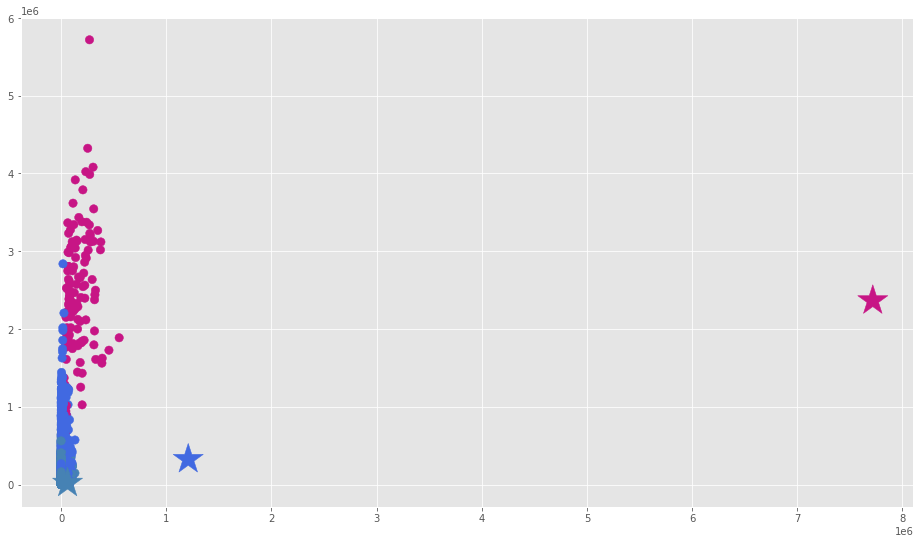

In [143]:
f1 = dataframe['XLarge Bags'].values
f2 = dataframe['Large Bags'].values

plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:,0], C[:,1], marker="*", c=colores, s=1000)
plt.show()

In [145]:
copy =  pd.DataFrame()
copy['year']=dataframe['year'].values
copy['Unnamed: 0']=dataframe['Unnamed: 0'].values
copy['label'] = labels
cantidadGrupo =  pd.DataFrame()
cantidadGrupo['color']=colores
cantidadGrupo['cantidad']=copy.groupby('label').size()
cantidadGrupo

,color,cantidad
0,steelblue,17091
1,mediumvioletred,135
2,royalblue,1023


In [147]:
group_referrer_index = copy['label'] ==0
group_referrals = copy[group_referrer_index]
 
diversidadGrupo =  pd.DataFrame()
diversidadGrupo['Unnamed: 0']=dataframe['Unnamed: 0']
diversidadGrupo['cantidad']=group_referrals.groupby('Unnamed: 0').size()
diversidadGrupo

,Unnamed: 0,cantidad
0,0,394.0
1,1,399.0
2,2,397.0
3,3,400.0
4,4,404.0
...,...,...
18244,7,NaN
18245,8,NaN
18246,9,NaN
18247,10,NaN


In [149]:
closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, X)
closest
users=dataframe['Unnamed: 0'].values
for row in closest:
    print(users[row])

35
0
8
